In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Set style
sns.set_style('whitegrid')

Step_By_Step plan
Step:1 Load and inspect the dataset
Step:2 Clean and progress the data
Step:3 Analyize funding trends over time
Step:4 Identify top funded sectors,Cities,startup
Step:5 Analyize investor behavior step
Step:6 Analyize investment types and stages step
Step:7 Correlation analysis
Step:8 Identity

In [ ]:
#Step:1 Load ans inspect the dataset
import pandas as pd # Moved import outside the function

def readscsv(filepath,filename):
  import os
  # os.chdir(filepath) # No need to change directory if using the full path
  file = pd.read_excel(os.path.join(filepath, filename)) # Use os.path.join for better path handling

  return file

filepath = "/content/drive/MyDrive/Day1 python" # Correct filepath
filename = "startup_funding123.xlsx" # Correct filename

df = readscsv(filepath,filename)

In [ ]:
#inspect first few rows
print("first 5 rows:")
print(df.head())

#Basic info
print("\ndataset info:")
print(df.info())

#check for missing values
print("nMissing Values")
print(df.isnull().sum())

first 5 rows:
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Privat

In [ ]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks'],
      dtype='object')

In [ ]:
#fill Missing Values
df['Industry_Vertical']=df['Industry_Vertical'].fillna('others')
df['SubVertical']=df['SubVertical'].fillna('Not specified')
df['City_Loaction']=df['City_Location'].fillna('Not specified')
df['Investors_Name']=df['Investors_Name'].fillna('Not specified')

In [ ]:
#convert data columns to datatime and extract year/month
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [ ]:
#Apply the function to the Next Column
df['Amount_In_INR']=df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

In [ ]:
#save column data
df.to_csv('cleaned_startup_funding.csv',index=False)

Step3: Funding Trends Over Time
Objective:Analyze how funding has evolaved year over your and with over month
Explanation:
.A countplot shows the number of funding deals over the years
.A line plot shows total funding amount per year,helping growth or decline trends

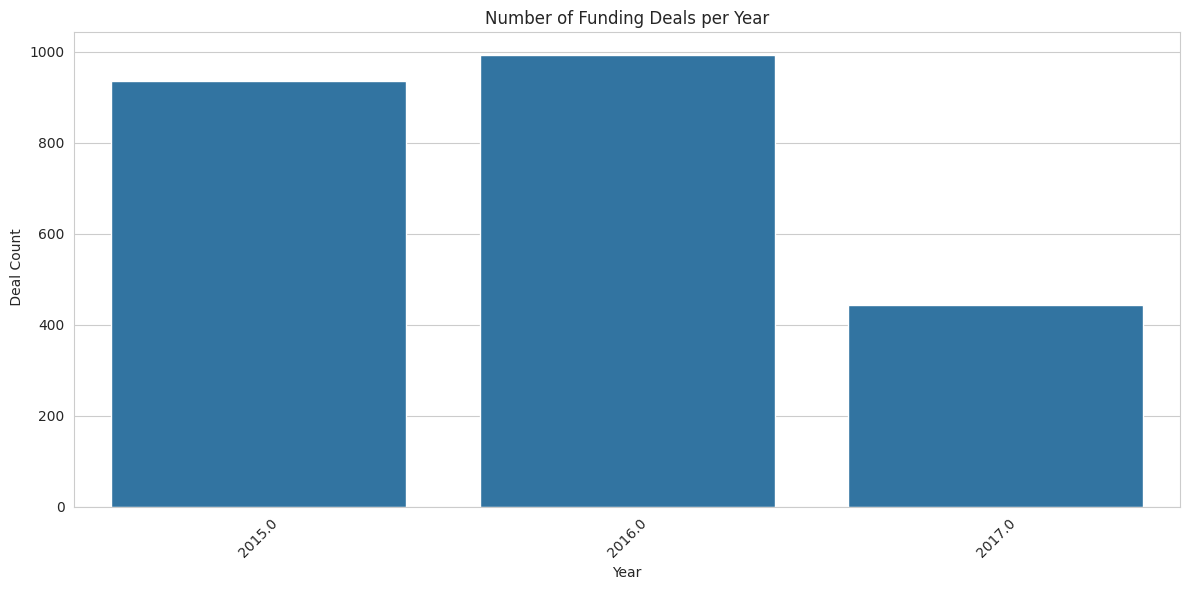

In [ ]:
#Number of deals per year
plt.figure(figsize=(12,6))
sns.countplot(x='Year',data=df)
plt.title("Number of Funding Deals per Year")
plt.xlabel("Year")
plt.ylabel(" Deal Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

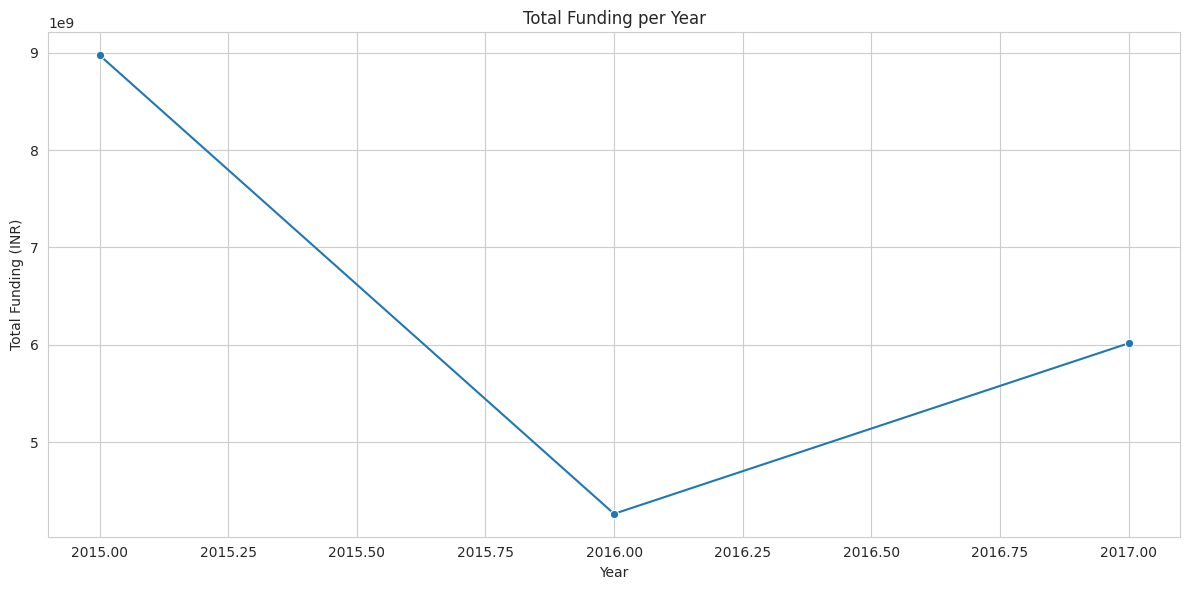

In [ ]:
#Total funding per year
yearly_funding=df.groupby('Year')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Amount_In_INR',data=yearly_funding,marker='o')
plt.xlabel("Year")
plt.ylabel("Total Funding (INR)")
plt.title("Total Funding per Year")
plt.grid(True)
plt.tight_layout()
plt.show()

Step:4 Top Funded sectors cities,and startups


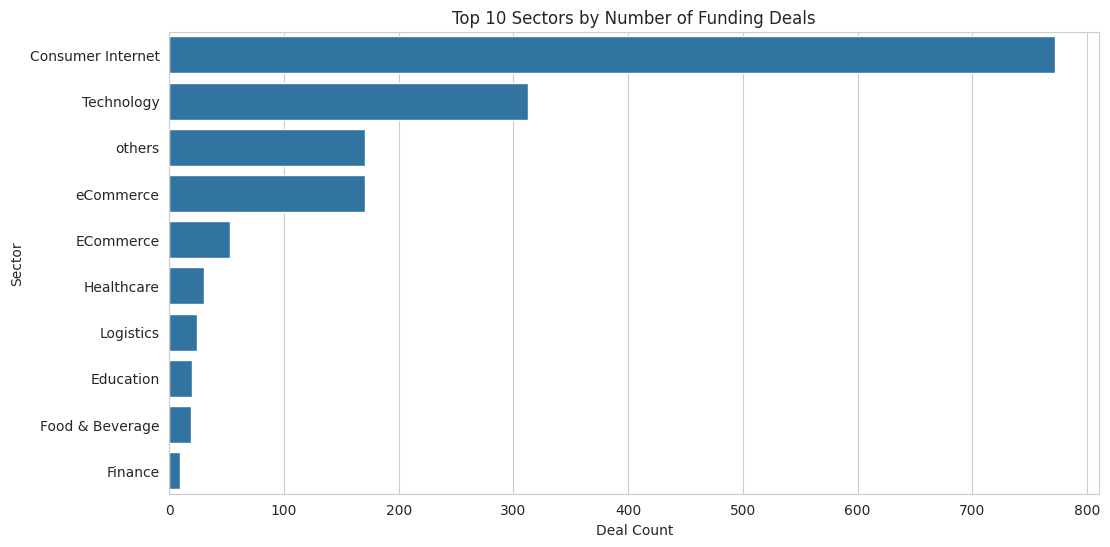

In [ ]:
#Total Sectors by deal count
top_sectors=df['Industry_Vertical'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_sectors.values,y=top_sectors.index)
plt.title("Top 10 Sectors by Number of Funding Deals")
plt.xlabel("Deal Count")
plt.ylabel("Sector")
plt.show()

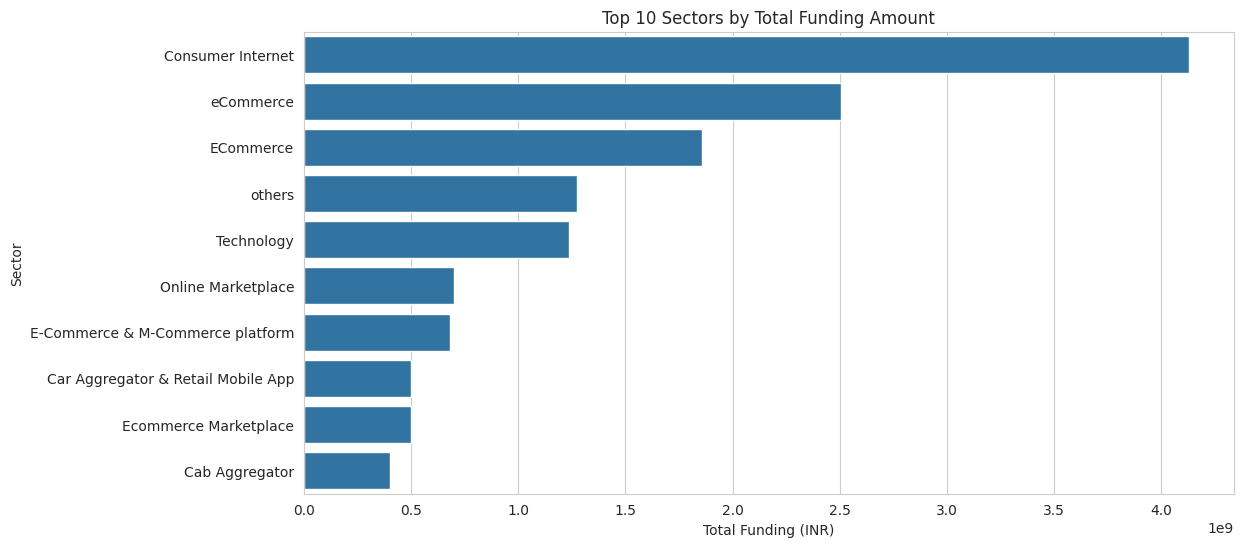

In [ ]:
#Top Sectors By total funding
df['Industry_Vertical']=df['Industry_Vertical'].replace(['E-commerce','Ecommerce'])
Sector_funding=df.groupby('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=Sector_funding.values,y=Sector_funding.index)
plt.title("Top 10 Sectors by Total Funding Amount")
plt.xlabel("Total Funding (INR)")
plt.ylabel("Sector")
plt.show()

Step:5 Investors Analysis
Explnation
.Investors are individual names
.Top Investors are identified by number of deals and total funding


In [ ]:
#sqlit multiple investors and count
investors_df=df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.split(',')
investors_df=investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.strip().str.title()

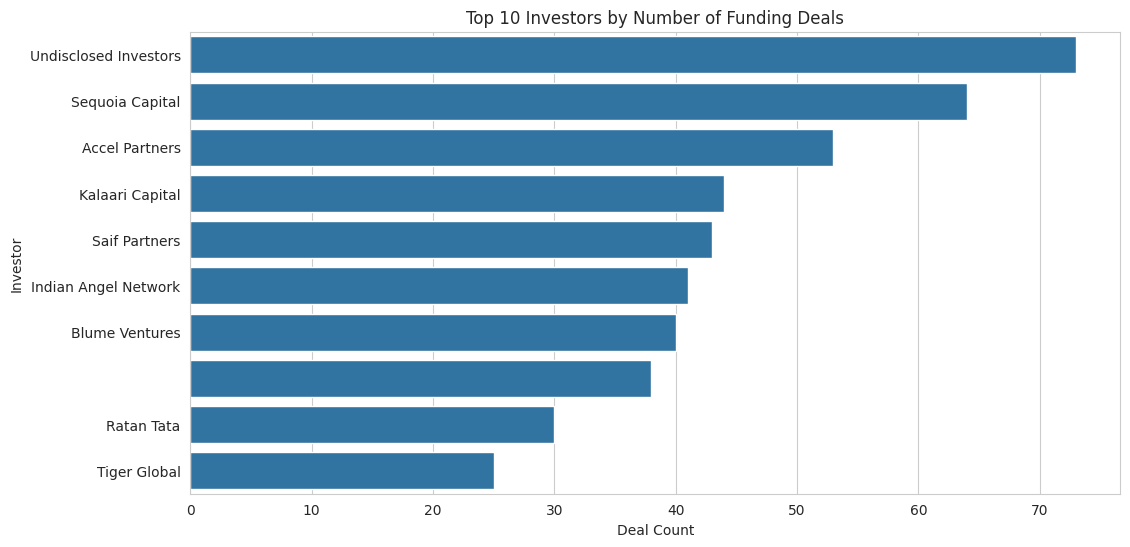

In [ ]:
#top investors by number of deals
top_inverstors_deals=investors_df['Investors_Name'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_inverstors_deals.values,y=top_inverstors_deals.index)
plt.title("Top 10 Investors by Number of Funding Deals")
plt.xlabel("Deal Count")
plt.ylabel("Investor")
plt.show()

step:6 Investment type Analysis


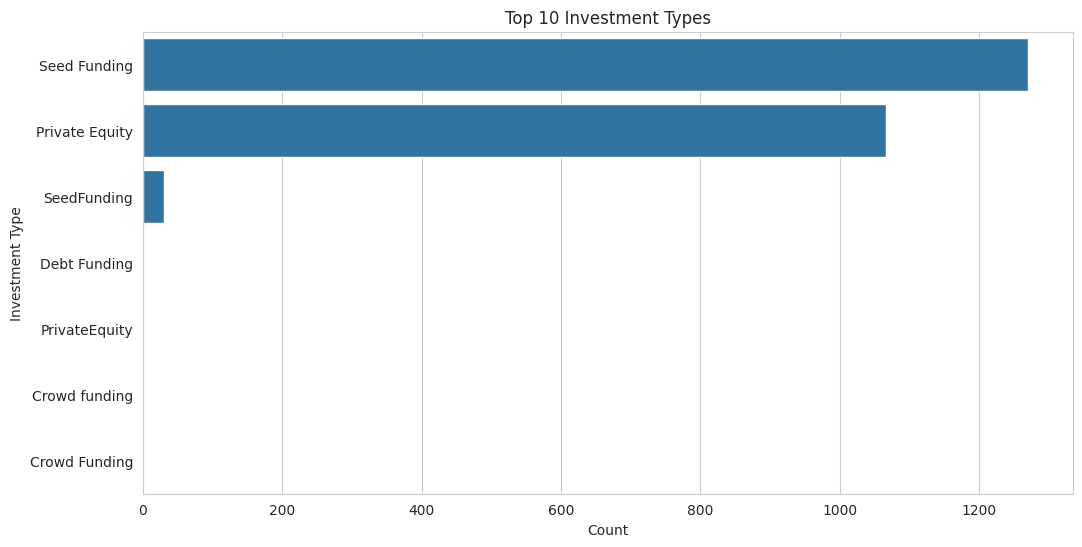

In [ ]:
investment_type=df['InvestmentType'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=investment_type.values,y=investment_type.index)
plt.title("Top 10 Investment Types")
plt.xlabel("Count")
plt.ylabel("Investment Type")
plt.show()

Step:7 Correlation Between Sector and Investment Type


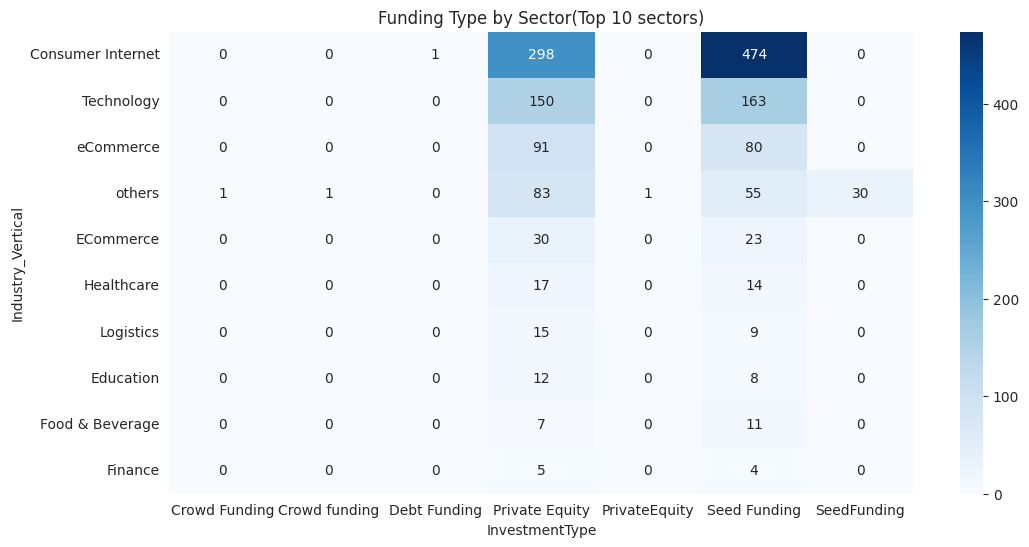

In [ ]:
sector_stage=pd.crosstab(df['Industry_Vertical'],df['InvestmentType'])
sector_stage=sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

plt.figure(figsize=(12,6))
sns.heatmap(sector_stage,annot=True,fmt='d',cmap='Blues')
plt.title("Funding Type by Sector(Top 10 sectors)")
plt.show()

Step:8 Funding Distribution and Outlines

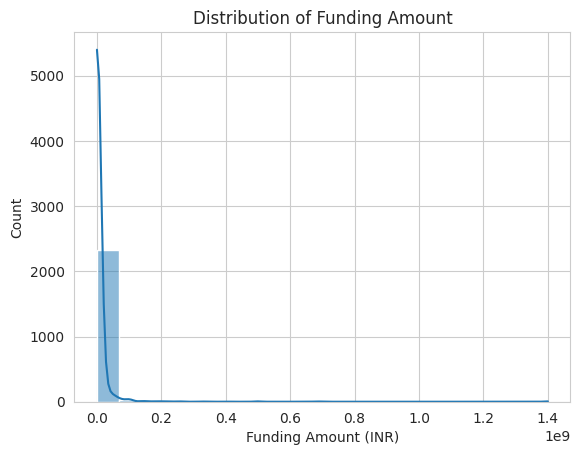

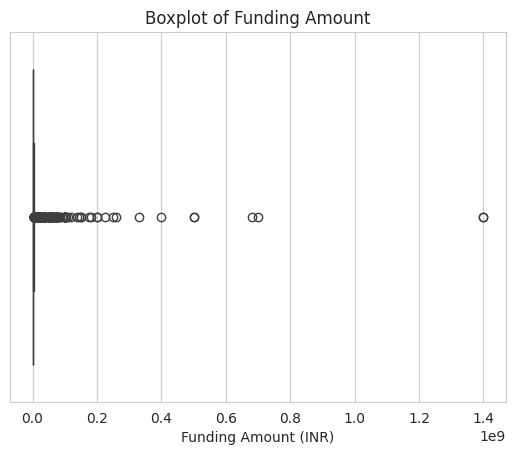

In [ ]:
import seaborn as sns
sns.histplot(df['Amount_In_INR'],bins=20,kde=True)
plt.title("Distribution of Funding Amount")
plt.xlabel("Funding Amount (INR)")
plt.show()

sns.boxplot(x=df['Amount_In_INR'])
plt.title("Boxplot of Funding Amount")
plt.xlabel("Funding Amount (INR)")
plt.show()

Step:9 Growth Trend of Top Sectors

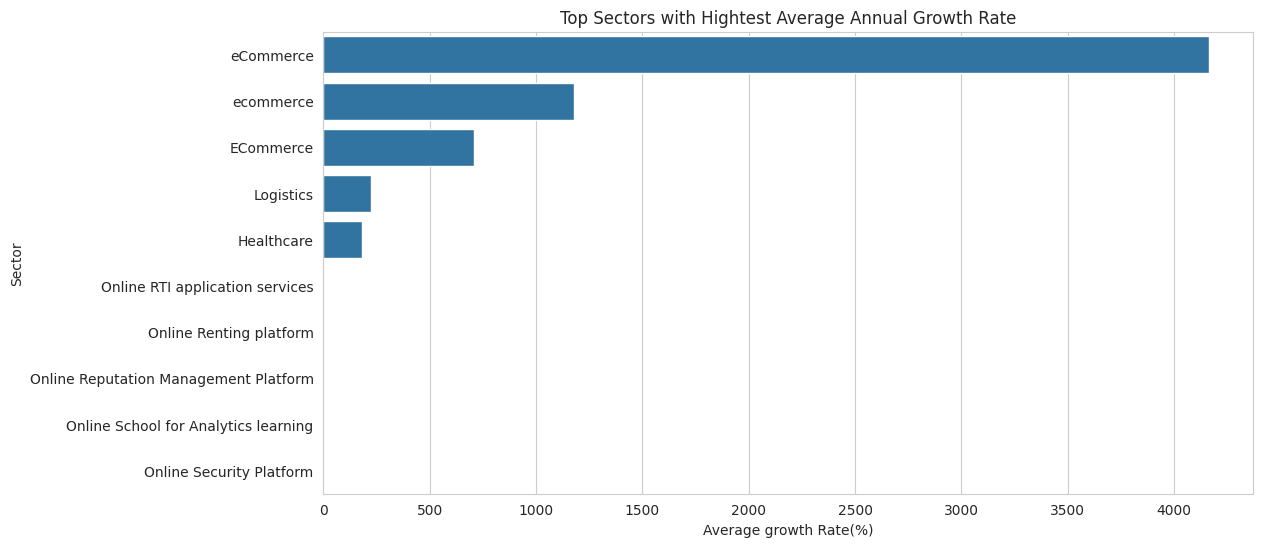

In [ ]:
sector_yearly =df.groupby(['Year','Industry_Vertical'])['Amount_In_INR'].sum().unstack()#.fillna(0)
sector_growth = sector_yearly.pct_change().mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=sector_growth.values*100, y=sector_growth.index)
plt.title("Top Sectors with Hightest Average Annual Growth Rate")
plt.xlabel("Average growth Rate(%)")
plt.ylabel("Sector")
plt.show()

In [ ]:
#sqlit multiple investors and count
investors_df=df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.split(',')
investors_df=investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
def clssify_investor(name):
    name = name.lower()
    if any(word in name for word in['capital','ventires','pertners','fund','vc','labs']):
      return 'VC'
    elif any(word in name for word in['angel','network']):
      return 'Angel'
    elif any(word in name for word in['crop','limited','pvt','ltd','lnc']):
      return 'Corporate'
    else:
      return 'Other'

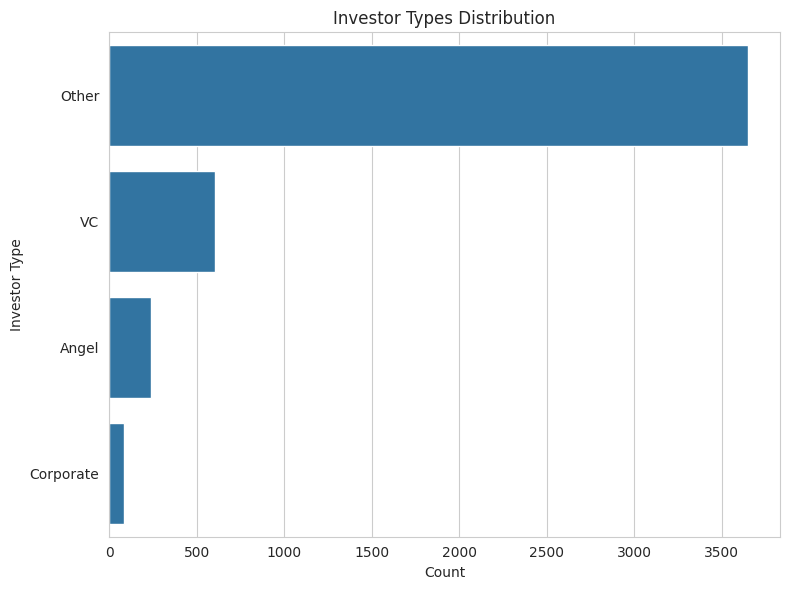

In [ ]:
investors_df['Investor_Type']=investors_df['Investors_Name'].apply(clssify_investor)
investor_type_counts=investors_df['Investor_Type'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=investor_type_counts.values,y=investor_type_counts.index)
plt.title("Investor Types Distribution")
plt.xlabel("Count")
plt.ylabel("Investor Type")
plt.tight_layout()
plt.show()

3 Repeat Investement Analysis

Goal: Identify inverstors who many startup are funding

In [ ]:
#sqlit multiple investors and count
investors_df=df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.split(',')
investors_df=investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
#Count how many an investor in the startup
investor_startup_counts = investors_df.groupby('Investors_Name')['StartupName'].size().reset_index(name='Dev')
repeat_investors = investor_startup_counts[investor_startup_counts['Dev']>1]

repeat_investors_summary = repeat_investors.groupby('Investors_Name')['Dev'].sum().sort_values(ascending=False).head(10)

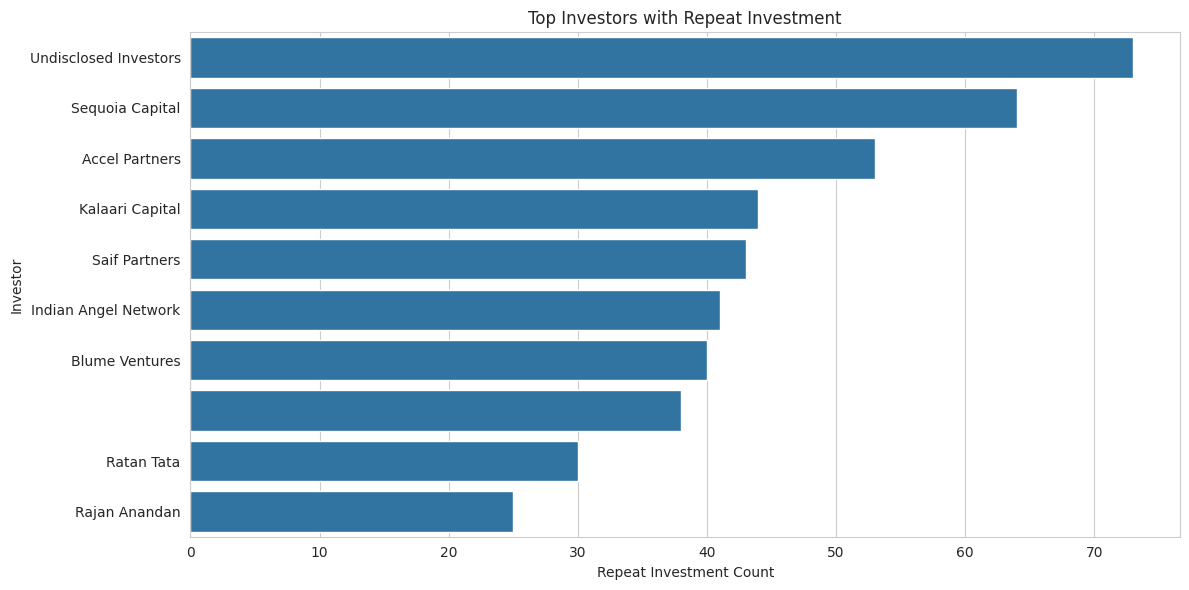

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=repeat_investors_summary.values, y=repeat_investors_summary.index)
plt.title("Top Investors with Repeat Investment")
plt.xlabel("Repeat Investment Count")
plt.ylabel("Investor")
plt.tight_layout()
plt.show()

Funding Stage Analysis

Objective:Understand how many startup are in early satge vs late stage

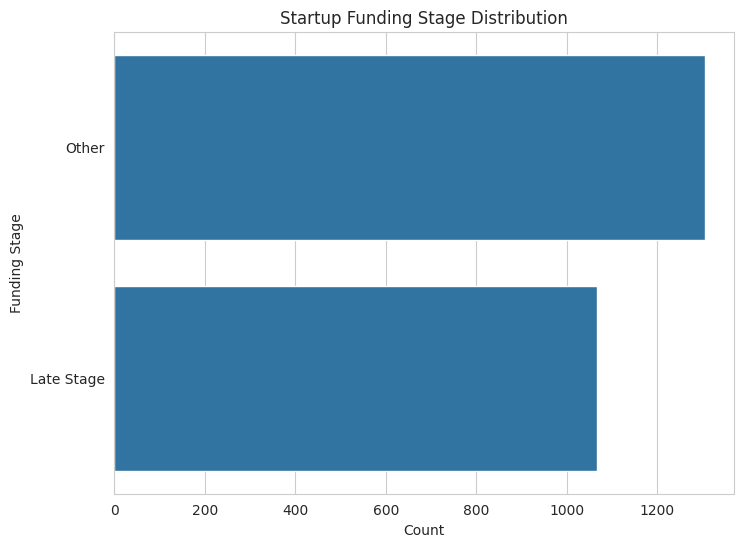

In [ ]:
#Define stage categories
early_stage = ['Seed','Pre-Seed','Angel']
late_stage = ['Series A','Series B','Series C','Series D','Series E','Private Equity','Venture Debt','Debt Funding']

df['Funding_Stage'] = df['InvestmentType'].str.strip().str.title()
df['Funding_Stage'] = df['Funding_Stage'].apply(lambda x: 'Early Stage' if x in early_stage else ('Late Stage' if x in late_stage else 'Other'))

#plot
plt.figure(figsize=(8,6))
sns.countplot(y='Funding_Stage', data=df, order=df['Funding_Stage'].value_counts().index)
plt.title("Startup Funding Stage Distribution")
plt.xlabel("Count")
plt.ylabel("Funding Stage")
plt.show()

Funding Type Vs sector

objective:Understand which investment types are most common in each sector


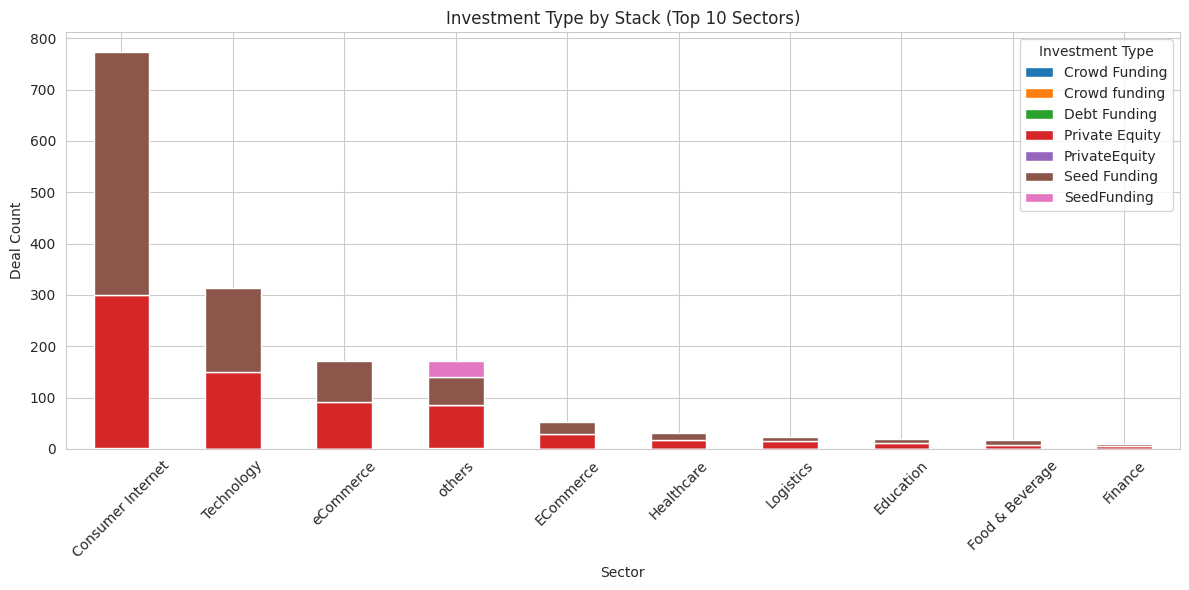

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'], df['InvestmentType'])
sector_stage = sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

sector_stage.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Investment Type by Stack (Top 10 Sectors)")
plt.xlabel("Sector")
plt.ylabel("Deal Count")
plt.xticks(rotation=45)
plt.legend(title='Investment Type')
plt.tight_layout()
plt.show()